In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 데이터 로드
file_path = 'C:\\Users\\Admin\\Documents\\GitHub\\sg_2cha\\jh\\data5\\E-Commerce Churn Data.csv'  # 파일 경로를 지정하세요
data = pd.read_csv(file_path)

# 2. 수치형 열 선택
numeric_columns = [
    'CustomerID', 'Churn', 'Tenure', 'WarehouseToHome', 'HourSpendOnApp',
    'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
    'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
    'DaySinceLastOrder', 'CashbackAmount'
]
numeric_data = data[numeric_columns]

# 3. 결측값 처리 (평균값으로 대체)
numeric_data.fillna(numeric_data.mean(), inplace=True)

# 4. 데이터 표준화
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data)

# 5. PCA 수행
pca = PCA()
pca_result = pca.fit_transform(scaled_numeric_data)

# 6. PCA 결과 해석
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# 7. PCA 결과 요약
pca_summary = pd.DataFrame({
    '주성분': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    '분산 설명 비율': explained_variance_ratio,
    '누적 분산 설명 비율': cumulative_variance_ratio
})

# 8. 결과 출력
print("PCA 결과 요약:")
print(pca_summary)


PCA 결과 요약:
     주성분  분산 설명 비율  누적 분산 설명 비율
0    PC1  0.192108     0.192108
1    PC2  0.128384     0.320492
2    PC3  0.100692     0.421185
3    PC4  0.083671     0.504856
4    PC5  0.075098     0.579954
5    PC6  0.071917     0.651871
6    PC7  0.067539     0.719410
7    PC8  0.060529     0.779939
8    PC9  0.053203     0.833142
9   PC10  0.046802     0.879944
10  PC11  0.039117     0.919061
11  PC12  0.031338     0.950399
12  PC13  0.027731     0.978130
13  PC14  0.021870     1.000000


c:\Users\Admin\miniconda3\envs\0102\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [5]:

# 수치형 열 선택
numeric_columns = [
    'CustomerID', 'Churn', 'Tenure', 'WarehouseToHome', 'HourSpendOnApp',
    'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
    'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
    'DaySinceLastOrder', 'CashbackAmount'
]
numeric_data = data[numeric_columns]

# 결측값 처리 (평균값으로 대체)
numeric_data = numeric_data.copy()  # 경고 방지용 복사
numeric_data.fillna(numeric_data.mean(), inplace=True)

# 데이터 표준화
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data)

# PCA 수행
pca = PCA()
pca_result = pca.fit_transform(scaled_numeric_data)

# 차원 축소: PC1 ~ PC2 (2D 시각화용)
reduced_data_2d = pca_result[:, :2]  # PC1과 PC2 선택

# 차원 축소: PC1 ~ PC5 (효율적 데이터 분석용)
reduced_data_5d = pca_result[:, :5]  # PC1 ~ PC5 선택

# 차원 축소: PC1 ~ PC10 (세부적인 분석용)
reduced_data_10d = pca_result[:, :10]  # PC1 ~ PC10 선택

# 결과 출력
print("2D 차원 축소 데이터 (PC1 ~ PC2):")
print(reduced_data_2d[:5])  # 처음 5개 데이터 출력

print("\n5D 차원 축소 데이터 (PC1 ~ PC5):")
print(reduced_data_5d[:5])  # 처음 5개 데이터 출력

print("\n10D 차원 축소 데이터 (PC1 ~ PC10):")
print(reduced_data_10d[:5])  # 처음 5개 데이터 출력


2D 차원 축소 데이터 (PC1 ~ PC2):
[[-1.65798827  0.31695529]
 [-2.28417068  1.12247568]
 [-2.44053733  0.51922695]
 [-2.29331723  0.83327404]
 [-2.46682637  0.30532878]]

5D 차원 축소 데이터 (PC1 ~ PC5):
[[-1.65798827  0.31695529  0.74850994  2.60257043  0.39209391]
 [-2.28417068  1.12247568  0.3245929   2.34963812  0.40456165]
 [-2.44053733  0.51922695  1.09754323  2.41668076  1.13180968]
 [-2.29331723  0.83327404  0.50689741  1.32591553 -1.10993898]
 [-2.46682637  0.30532878  1.62181213  0.91755249 -1.98627439]]

10D 차원 축소 데이터 (PC1 ~ PC10):
[[-1.65798827  0.31695529  0.74850994  2.60257043  0.39209391 -1.79146842
   0.08020814  0.88015901  0.84810322  1.6224987 ]
 [-2.28417068  1.12247568  0.3245929   2.34963812  0.40456165 -1.15684411
  -0.77743386  0.49376109 -0.11157371  0.04715982]
 [-2.44053733  0.51922695  1.09754323  2.41668076  1.13180968  0.96684301
   0.63302075  0.81226586 -0.90497796  0.24492836]
 [-2.29331723  0.83327404  0.50689741  1.32591553 -1.10993898  1.20164279
  -2.51299031  1.

c:\Users\Admin\miniconda3\envs\0102\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Admin\miniconda3\envs\0102\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


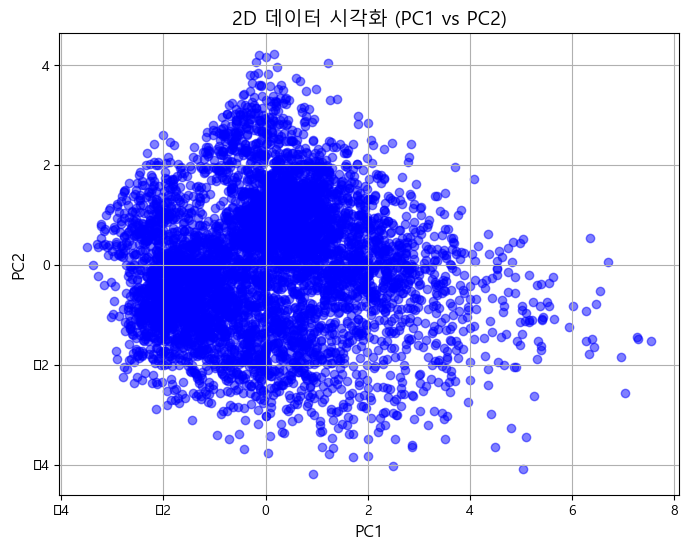

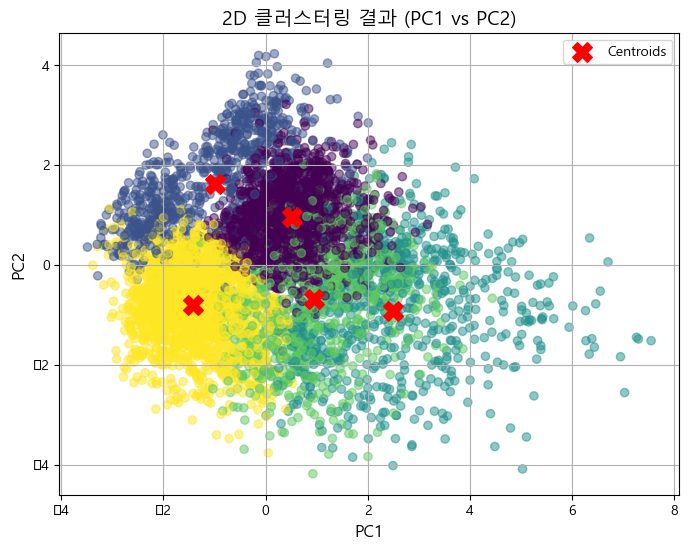

클러스터별 데이터 크기:
0    1464
1     809
2     721
3     842
4    1794
dtype: int64


In [5]:
plt.rcParams['font.family'] = 'Malgun Gothic'

# 필요한 모듈 다시 가져오기
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 수치형 열 선택
numeric_columns = [
    'CustomerID', 'Churn', 'Tenure', 'WarehouseToHome', 'HourSpendOnApp',
    'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
    'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
    'DaySinceLastOrder', 'CashbackAmount'
]
numeric_data = data[numeric_columns]

# 결측값 처리 (평균값으로 대체)
numeric_data = numeric_data.copy()  # SettingWithCopyWarning 방지
numeric_data.fillna(numeric_data.mean(), inplace=True)

# 데이터 표준화
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data)

# PCA 수행
pca = PCA()
pca_result = pca.fit_transform(scaled_numeric_data)

# 차원 축소: PC1 ~ PC2 (2D 시각화용)
reduced_data_2d = pca_result[:, :2]  # PC1과 PC2 선택

# 차원 축소: PC1 ~ PC5 (클러스터링용)
reduced_data_5d = pca_result[:, :5]  # PC1 ~ PC5 선택

# K-Means 클러스터링 수행 (5개의 클러스터로 설정)
kmeans_5d = KMeans(n_clusters=5, random_state=42)
clusters_5d = kmeans_5d.fit_predict(reduced_data_5d)

# 1. 2D 시각화: reduced_data_2d 산점도
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_2d[:, 0], reduced_data_2d[:, 1], alpha=0.5, c='blue')
plt.title("2D 데이터 시각화 (PC1 vs PC2)", fontsize=14)
plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)
plt.grid(True)
plt.show()

# 2. 클러스터링 결과 시각화 (PC1 vs PC2)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_2d[:, 0], reduced_data_2d[:, 1], c=clusters_5d, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_5d.cluster_centers_[:, 0], kmeans_5d.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("2D 클러스터링 결과 (PC1 vs PC2)", fontsize=14)
plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# 클러스터별 데이터 크기 출력
cluster_counts = pd.Series(clusters_5d).value_counts().sort_index()
print("클러스터별 데이터 크기:")
print(cluster_counts)



=== 클러스터별 평균값 ===
            Tenure  WarehouseToHome  HourSpendOnApp  SatisfactionScore  \
Cluster                                                                  
0         8.065708        16.175787        3.456104           2.836749   
1         2.204330        17.457143        2.989348           3.541409   
2        13.369958        15.380084        3.023977           3.251040   
3        21.576010        15.209275        2.940048           3.119952   
4         8.402492        14.674447        2.388786           2.941472   

         OrderCount  CashbackAmount  OrderAmountHikeFromlastYear  CouponUsed  
Cluster                                                                       
0          2.500353      172.767077                    16.678742    1.692730  
1          2.153750      153.257108                    15.553218    1.324224  
2          9.067747      213.578363                    15.439344    5.369066  
3          2.500711      234.176960                    15.517291   

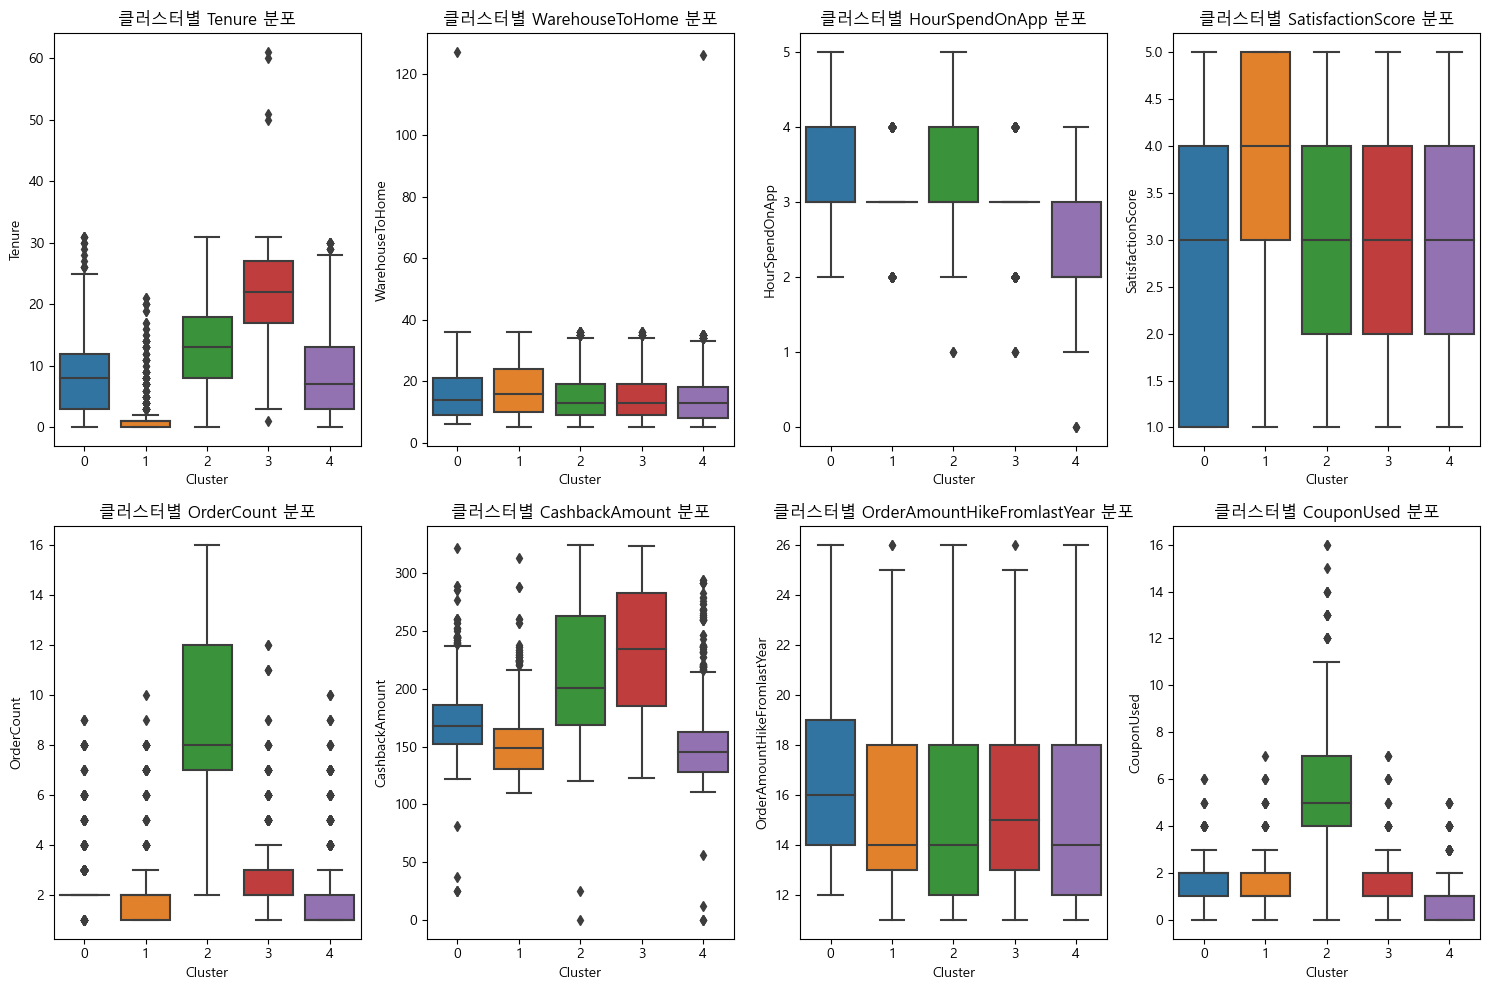

c:\Users\Admin\miniconda3\envs\0102\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Admin\miniconda3\envs\0102\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


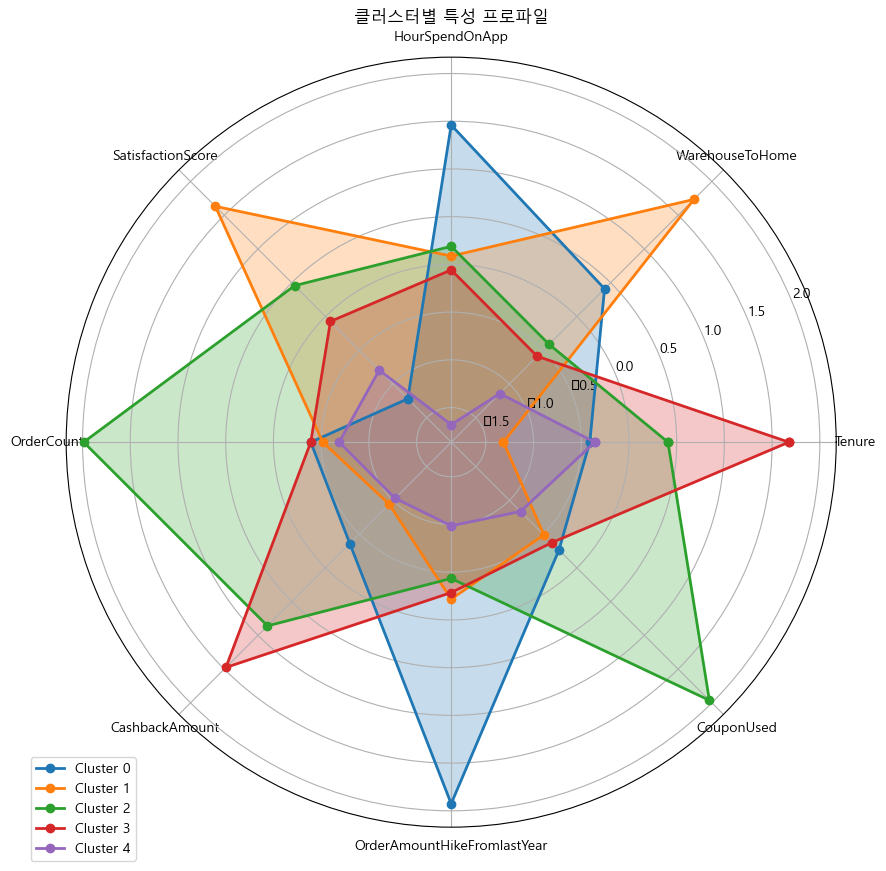


=== Tenure 클러스터별 상세 통계 ===
          count       mean       std  min   25%   50%   75%   max
Cluster                                                          
0        1461.0   8.065708  6.050908  0.0   3.0   8.0  12.0  31.0
1         739.0   2.204330  3.862850  0.0   0.0   1.0   1.0  21.0
2         719.0  13.369958  7.501123  0.0   8.0  13.0  18.0  31.0
3         842.0  21.576010  6.624786  1.0  17.0  22.0  27.0  61.0
4        1605.0   8.402492  6.874634  0.0   3.0   7.0  13.0  30.0

=== WarehouseToHome 클러스터별 상세 통계 ===
          count       mean       std  min   25%   50%   75%    max
Cluster                                                           
0        1462.0  16.175787  8.761726  6.0   9.0  14.0  21.0  127.0
1         735.0  17.457143  8.675532  5.0  10.0  16.0  24.0   36.0
2         713.0  15.380084  8.336329  5.0   9.0  13.0  19.0   36.0
3         841.0  15.209275  8.054810  5.0   9.0  13.0  19.0   36.0
4        1628.0  14.674447  8.425291  5.0   8.0  13.0  18.0  126.0

===

In [6]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

# 클러스터 레이블을 원본 데이터에 추가
data['Cluster'] = clusters_5d

# 분석할 주요 변수 선택
features_to_analyze = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp',
    'SatisfactionScore', 'OrderCount', 'CashbackAmount',
    'OrderAmountHikeFromlastYear', 'CouponUsed'
]

# 클러스터별 평균값 계산
cluster_means = data.groupby('Cluster')[features_to_analyze].mean()
print("\n=== 클러스터별 평균값 ===")
print(cluster_means)

# 클러스터별 표준편차 계산
cluster_std = data.groupby('Cluster')[features_to_analyze].std()
print("\n=== 클러스터별 표준편차 ===")
print(cluster_std)

# 시각화: 클러스터별 특성 비교
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_analyze, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='Cluster', y=feature, data=data)
    plt.title(f'클러스터별 {feature} 분포')
plt.tight_layout()
plt.show()

# 레이더 차트로 클러스터 프로파일 시각화
# 데이터 정규화
scaler = StandardScaler()
normalized_means = pd.DataFrame(
    scaler.fit_transform(cluster_means),
    columns=features_to_analyze,
    index=cluster_means.index
)

# 레이더 차트 그리기
angles = np.linspace(0, 2*np.pi, len(features_to_analyze), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # 첫 점으로 다시 돌아가기 위해

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
for cluster in range(5):
    values = normalized_means.iloc[cluster].values
    values = np.concatenate((values, [values[0]]))
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(features_to_analyze)
plt.title('클러스터별 특성 프로파일')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

# 클러스터별 상세 통계 정보
for feature in features_to_analyze:
    print(f"\n=== {feature} 클러스터별 상세 통계 ===")
    print(data.groupby('Cluster')[feature].describe())
